In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

plt.style.use('seaborn')
%matplotlib inline

## Compra

In [226]:
compra = pd.read_csv('data/1_Orden_compra.csv', sep=';')
compra.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778.761
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321.208


In [227]:
#Variable categorica
compra['on_demand'].value_counts()

False    4225
True     3070
Name: on_demand, dtype: int64

In [228]:
#Se recodifica el atributo Booleano
compra['on_demand'] = np.where(compra['on_demand'] == False, 1, 0)

In [229]:
compra['on_demand'].value_counts()

1    4225
0    3070
Name: on_demand, dtype: int64

In [230]:
#Se actualizan los nombres de los atributos en el dataset
compra.rename(columns={'order_id':'id_orden', 'lat':'latitud', 'lng':'longitud', 'dow':'dia', 'promised_time':'promesa',
                       'actual_time':'entrega', 'on_demand':'id_entrega', 'picker_id':'id_recolector', 
                       'driver_id':'id_trasporte', 'store_branch_id':'id_tienda', 'total_minutes':'tiempo'}, inplace=True)

In [231]:
print("La cantidad de registros es de:", compra.shape[0])
print("La cantidad de atributos es de:", compra.shape[1])

La cantidad de registros es de: 7295
La cantidad de atributos es de: 11


In [232]:
#Se hace una tabla para observar los missing values
total = compra.isnull().sum().sort_values(ascending=False)
percent = round((compra.isnull().sum() / compra.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
tiempo,752,10.31
id_tienda,0,0.00
id_trasporte,0,0.00
id_recolector,0,0.00
id_entrega,0,0.00
entrega,0,0.00
promesa,0,0.00
dia,0,0.00
longitud,0,0.00
latitud,0,0.00


Se puede apreciar que en este dataset sólo el atributo `tiempo` contiene datos perdidos, con un monto de __752__ registros, los cuales representan el __10.31%__ de la data, se aislaran estos casos para hacer un estudio sobre ellos y así determinar si tienen características comunes, para así no eliminarlos del dataset ya que es un porcentaje relevante.

In [233]:
compra['tiempo'].fillna(0, inplace=True)

In [234]:
no_time = compra[compra['tiempo'] == 0]

In [235]:
no_time.head()

,id_orden,latitud,longitud,dia,promesa,entrega,id_entrega,id_recolector,id_trasporte,id_tienda,tiempo
6508,407703c42dd95fe9a2333f4ecc3937dc,18.202.137.973.699.000,-10.033.731.359.663.800,2,12:00:00,10:47:54,1,b59226b7137a4d46eef766a3f9a7f7d8,b59226b7137a4d46eef766a3f9a7f7d8,a5dc7c0c6d03a417245655307351f6e3,0
6509,c3aa2be4956b984fe5edec2b47ed5cf3,1.828.884.263.256.330,-10.034.603.568.646.800,2,12:00:00,11:08:25,1,b0d7d5cdd7314263a8117e2f131c2007,b0d7d5cdd7314263a8117e2f131c2007,a3bed30221372366bcd9b9779f395d0b,0
6510,828021ba0dd464537cf1db4f16a90cf5,18.385.240.935.912.800,-10.037.902.984.359.000,2,11:00:00,9:59:37,1,04ed12b8648d0935cbf8b911e95ffbfc,04ed12b8648d0935cbf8b911e95ffbfc,585d8f4f36bc74acf0fc1fae7913b404,0
6511,0631e16286d87620de04a93ffaa268cc,1.829.399.876.129.580,-10.035.002.790.639.300,2,12:00:00,10:51:31,1,763e3a6a418788475a7dd673e837e2aa,763e3a6a418788475a7dd673e837e2aa,02020427c72aa211602ead141160a9eb,0
6512,17561ec034e13e8c272c37948888d7d1,1.829.500.199.821.810,-10.033.816.045.959.600,2,9:00:00,8:48:39,1,b0d7d5cdd7314263a8117e2f131c2007,b0d7d5cdd7314263a8117e2f131c2007,9edf91c62aa286f44ff3d5bdc8fd4126,0


## Productos

In [236]:
productos = pd.read_csv('data/2_Orden_productos.csv', sep=';')
productos.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1,1.000,UN


In [237]:
#Se actualiza el nombre del atributo que identifica la orden de compra
productos.rename(columns={'order_id':'id_orden'}, inplace=True)

In [238]:
print("La cantidad de registros es de:", productos.shape[0])
print("La cantidad de atributos es de:", productos.shape[1])

La cantidad de registros es de: 120876
La cantidad de atributos es de: 5


No se encontraron datos perdidos en este dataset.

In [239]:
productos.isnull().any()

id_orden          False
product_id        False
quantity          False
quantity_found    False
buy_unit          False
dtype: bool

Se procederá a separar aquellos productos que se pesany y se contabilizan como 1, los que son por unidad mantendremos la cantidad. 
El objetivo de esta segmentación es posteriormente tener una columna de productos que son pesado y otras que son por unidad, ya que para este caso sólo nos importa la cantidad total de productos (pesados y por unidad) por orden, si bien tenemos un código de producto por el momento no podremos determinar que tipo de producto, si tendríamos esa información disponible podríamos determinar que productos que son pesados pueden influenciar más o menos en el tiempo de entrega, así que, nos concentraremos en la cantidad de productos por orden.

In [240]:
#Creamos una columna de tipo bandera, para determinar que las cantidades que están en el atributo quantity,
#correspondan con su respectiva unidad
productos['cantidad_ajustada'] = np.where(productos['buy_unit'] == 'KG' , 1, productos['quantity'])
productos['cantidad_ajustada'] = pd.to_numeric(productos['cantidad_ajustada'])

Para este caso cuando se evaluó la columna de "tipo bandera"--> `cantidad_ajustada`, se pudo apreciar que teníamos 2 casos anómalos ya que acá todos los valores tenían que ser entero y descubrimos que existen 2 casos donde en la columna `quantity` hay valores decimales y en la columna `buy_unit` su valor es __UN__ representando esto como Unidad, cuando en realidad es de tipo __KG__, se prodecerá a actualizar estos registros y volver a actualizar la columna `cantidad_ajustada`.

In [241]:
no_KG = productos.loc[(productos['cantidad_ajustada'] == 0.225) | (productos['cantidad_ajustada'] == 0.090)]
no_KG.head()

,id_orden,product_id,quantity,quantity_found,buy_unit,cantidad_ajustada
29253,7a1be969ec97b66b710f7dc5b80f8a6f,068566a7b65d4093075f13ae383aa3d4,0.09,0.090,UN,0.090
96244,a5fc3ba3db31ac6a1ea5ddb87dcbc596,e0922ceeaeb05c556c27138d10305932,0.225,0.225,UN,0.225


Existen par de productos que en la __unidad de compra__ marcan como __"UN"__ cuando en realidad son de tipo __"KG"__.

In [242]:
#Se reemplazan esos valores por los verdaderos
productos.loc[29253, 'buy_unit'] = 'KG'
productos.loc[96244, 'buy_unit'] = 'KG'

In [243]:
#Se actualizan los datos
productos['cantidad_ajustada'] = np.where(productos['buy_unit'] == 'KG' , 1, productos['quantity'])
productos['cantidad_ajustada'] = pd.to_numeric(productos['cantidad_ajustada'])

In [244]:
#productos['cantidad_aj'] = np.where(np.isnan(productos['cantidad_aj']), np.nan, productos['cantidad_aj'])
#productos['cantidad_aj'] = np.where(productos['cantidad_aj'] > 120, 'outlier', productos['cantidad_aj'])

No se encontraron Outliers.

Separamos en tipo de productos: Aquellos que se pesan y aquellos que no, además, crearemos una columna extra que será la cantidad total, conformada por la suma entre los productos sin pesar con los que se pesan.

In [245]:
tipo = pd.get_dummies(productos['buy_unit'])

In [246]:
productos['sin_pesar'] = tipo['UN']
productos['pesados'] = tipo ['KG']
productos['cantidad_total'] = productos['sin_pesar'] + productos['pesados']
productos.drop(columns=['quantity', 'quantity_found', 'buy_unit', 'product_id', 'cantidad_ajustada'], inplace=True)

In [247]:
productos_agrupados = productos.groupby(by='id_orden').sum().reset_index()

In [248]:
productos_agrupados.head()

,id_orden,sin_pesar,pesados,cantidad_total
0,001ef94c50c71cb0e674b6293e9b6068,30,5,35
1,001f7583bb106a338d09a12a89e54cbd,5,0,5
2,002b6dcb32fef90ebb1cb691afe6a413,9,0,9
3,002ebc46f3e40c49044aceb8311df432,3,1,4
4,002f97bd7dad0d275d8511436c18b572,7,4,11


Finalmente, se hizo una agrupación del dataframe por número de orden, así consideramos solamente los productos que son pesado y los que no son pesados y la suma total de ellos.

## Recolector

In [249]:
recolector = pd.read_csv('data/3_Recolector.csv', sep=';')
recolector.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


In [250]:
print("La cantidad de registros es de:", recolector.shape[0])
print("La cantidad de atributos es de:", recolector.shape[1])

La cantidad de registros es de: 600
La cantidad de atributos es de: 6


In [251]:
#Se renombran las columnas del dataset
recolector.rename(columns={'shopper_id':'id_recolector', 'seniority':'clasificacion_recolector', 
                           'found_rate':'p_aciertos', 'picking_speed':'velocidad', 
                           'accepted_rate':'p_aceptacion', 'rating':'score_recolector'}, inplace=True)

Tenemos algunos datos perdidos en el dataset por lo que determinaremos el que cantidad representa en cada atributo para posteriormente aislar estos casos y analizarlos de una mejor manera.

In [252]:
recolector.isnull().any()

id_recolector               False
clasificacion_recolector    False
p_aciertos                   True
velocidad                   False
p_aceptacion                 True
score_recolector             True
dtype: bool

In [253]:
recolector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
id_recolector               600 non-null object
clasificacion_recolector    600 non-null object
p_aciertos                  564 non-null float64
velocidad                   600 non-null float64
p_aceptacion                594 non-null float64
score_recolector            566 non-null float64
dtypes: float64(4), object(2)
memory usage: 28.2+ KB


Podemos apreciar como existen __3 atributos__ los cuales tienen algunos datos perdidos, donde se representa en porcentaje la cifra de ellos en c/u.

In [254]:
total = recolector.isnull().sum().sort_values(ascending=False)
percent = round((recolector.isnull().sum() / recolector.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
p_aciertos,36,6.00
score_recolector,34,5.67
p_aceptacion,6,1.00
velocidad,0,0.00
clasificacion_recolector,0,0.00
id_recolector,0,0.00


Para este caso tenemos pocos atributos en nuestro dataset, por lo que emplearemos la técnica `get_dummies` para separar y convertir en nuevos atributos la columna `clasificacion_recolector`, la cual representa la clasificación del recolector y para este caso tenemos sólo __4 tipos__.

In [255]:
#Se contabilizan las categorías del atributo 'clasificacion_recolector'
recolector['clasificacion_recolector'].value_counts()

ADVANCED        268
INTERMEDIATE    204
REVIEW           99
BEGINNER         29
Name: clasificacion_recolector, dtype: int64

In [256]:
recolector = pd.get_dummies(recolector, columns=['clasificacion_recolector'], prefix='seniority', prefix_sep='_')

In [257]:
recolector.head()

,id_recolector,p_aciertos,velocidad,p_aceptacion,score_recolector,seniority_ADVANCED,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW
0,087ab65ceca40dbef697f585dc159d5d,0.8610,1.64,1.00,4.48,1,0,0,0
1,645973c41314d763b58dc2bceeeeffc9,0.8337,2.83,0.96,4.79,0,0,1,0
2,82810715fdda44962e7e422015ea1f32,0.8681,1.27,0.88,4.84,1,0,0,0
3,416aa7dbd5a2f58d7bca96657e8faa1e,0.8784,2.11,1.00,NaN,0,0,1,0
4,27a3e845a4c3eb7ded4748f84140a843,0.8466,1.50,1.00,4.84,1,0,0,0


## Tiendas

In [258]:
tienda = pd.read_csv('data/4_tienda.csv', sep=';')
tienda.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,1.824.774.341.566.610,-10.040.355.771.938.600
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203.111.495.565.700,-10.029.771.361.550.100


Podemos apreciar que no tenemos datos perdidos en el dataset.

In [259]:
tienda.isnull().any()

store_branch_id    False
store              False
lat                False
lng                False
dtype: bool

In [260]:
print("La cantidad de registros es de:", tienda.shape[0])
print("La cantidad de atributos es de:", tienda.shape[1])

La cantidad de registros es de: 113
La cantidad de atributos es de: 4


In [261]:
tienda.rename(columns={'store_branch_id':'id_tienda', 'store':'tienda', 'lat':'latitud_tienda',
                       'lng':'longitud_tienda'}, inplace=True)

## Consolidacion

In [262]:
#Consolidación de los df compra y prodructos
df = pd.merge(compra, productos_agrupados, how='left', on='id_orden')

In [263]:
#Consolidación del df con recolector
df = pd.merge(df, recolector, how='left', on='id_recolector')

In [264]:
#consolidación de todos los dataset
df = pd.merge(df, tienda, how='left', on='id_tienda')

In [265]:
print("La cantidad de registros final es de:", df.shape[0])
print("La cantidad de atributos final es de:", df.shape[1])

La cantidad de registros final es de: 7295
La cantidad de atributos final es de: 25


In [266]:
df.to_csv('data/consolidado.csv', header=True, index=False)

In [267]:
df.head()

,id_orden,latitud,longitud,dia,promesa,entrega,id_entrega,id_recolector,id_trasporte,id_tienda,...,velocidad,p_aceptacion,score_recolector,seniority_ADVANCED,seniority_BEGINNER,seniority_INTERMEDIATE,seniority_REVIEW,tienda,latitud_tienda,longitud_tienda
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,1,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,1.56,1.00,4.68,1,0,0,0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,1,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,...,1.14,1.00,4.76,1,0,0,0,387d4a5b65cf4bf00ad805c4b00eed01,18.163.960.871.027.900,-10.032.899.405.911.000
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,1,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,...,2.03,1.00,4.96,0,0,1,0,0fae7b61265bc7ca4ce4d81440b62501,1.824.565.541.228.880,-1.003.324.934.760.470
3,d3f7be6d64eae7405b7bf024e04807a2,18.248.884.004.419.400,-1.003.226.215.187.040,2,10:00:00,9:41:47,1,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,...,2.06,0.92,4.92,0,0,1,0,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440
4,e0ad6533b6cd9a382ec6c1d473c5036c,1.822.911.027.242.010,-10.032.267.241.783.800,2,11:00:00,10:07:53,1,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,...,1.89,1.00,4.92,1,0,0,0,452ae015bf846e1d2932b7ea15720d64,1.823.159.108.764.060,-10.031.450.001.698.800


In [268]:
df.isnull().any()

id_orden                  False
latitud                   False
longitud                  False
dia                       False
promesa                   False
entrega                   False
id_entrega                False
id_recolector             False
id_trasporte              False
id_tienda                 False
tiempo                    False
sin_pesar                  True
pesados                    True
cantidad_total             True
p_aciertos                 True
velocidad                 False
p_aceptacion               True
score_recolector           True
seniority_ADVANCED        False
seniority_BEGINNER        False
seniority_INTERMEDIATE    False
seniority_REVIEW          False
tienda                    False
latitud_tienda            False
longitud_tienda           False
dtype: bool

Existen datos perdidos en el dataset consolidado,vamos a calcular la cantidad en cada atributo, se mostrarán dichos datos en una tabla.

In [269]:
total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum() / df.isnull().count()) * 100, 2).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentaje (%)'])
missing_values

,Total,Porcentaje (%)
p_aciertos,83,1.14
score_recolector,77,1.06
pesados,17,0.23
cantidad_total,17,0.23
sin_pesar,17,0.23
p_aceptacion,6,0.08
id_tienda,0,0.00
latitud,0,0.00
longitud,0,0.00
dia,0,0.00


In [270]:
df.dropna(inplace=True)

Ahora tenemos un dataset limpio, donde hemos considerado eliminar algunos registros que representan como datos perdidos el __1.63%__ de la data final.

In [271]:
df.shape

(7176, 25)

## Análisis descriptivo cantidad de productos por orden

In [272]:
df_grafico = df.copy()
df_grafico['pesaje'] = np.where(df_grafico['pesados'] >= 1, 1, 0)

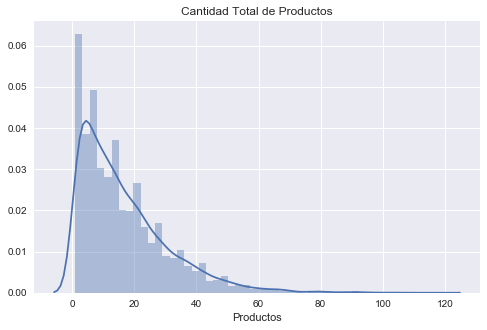

In [273]:
plt.figure(figsize=(8, 5))
sns.distplot(df_grafico['cantidad_total'])
plt.xlabel("Productos")
plt.title("Cantidad Total de Productos");

In [274]:
print("Promedio de Productos por compra:", round(df_grafico['cantidad_total'].mean(), 2))

Promedio de Productos por compra: 16.71


La mayor cantidad de compras son de cantidades bajas de productos, con un promedio de 16.7 productos por pedido

In [275]:
df_grafico.pesaje.value_counts()

1    4452
0    2724
Name: pesaje, dtype: int64

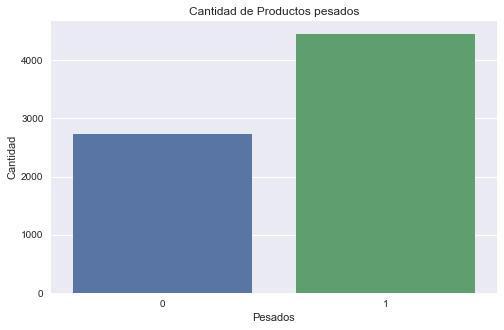

In [276]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_grafico, x='pesaje')
plt.xlabel("Pesados")
plt.ylabel("Cantidad")
plt.title("Cantidad de Productos pesados");

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

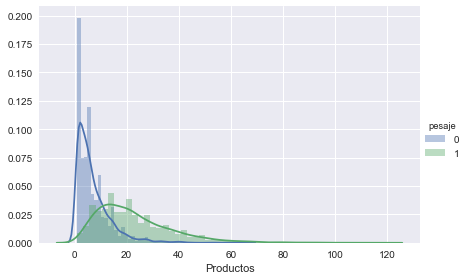

In [277]:
plt.figure(figsize=(10, 5))
g = sns.FacetGrid(df_grafico, hue="pesaje", size=4, aspect=1.5)
g = g.map(sns.distplot, "cantidad_total")
g.add_legend()
plt.xlabel("Productos");

In [278]:
print("Promedio de productos en ordenes sin productos que deban ser pesados = ", round(df_grafico.query("pesaje==0")['cantidad_total'].mean(), 2))
print("Promedio de productos en ordenes con productos que deban ser pesados = ", round(df_grafico.query("pesaje==1")['cantidad_total'].mean(), 2))

Promedio de productos en ordenes sin productos que deban ser pesados =  7.03
Promedio de productos en ordenes con productos que deban ser pesados =  22.63


El gráfico ademas nos muestra que aquellas compras que tienen productos que se deben pesar, tienen una distribución diferente a aquellos en los que no se pide ningun producto de pesaje, siendo su promedio mayor en aquellos que deben ser pesados

### Relacion con el tiempo de entrega

In [279]:
df.tiempo

0        91.800.861
1       206.599.732
2        93.458.001
3       124.778.761
4       130.321.208
5        74.993.118
6        65.901.589
7        93.661.068
8           665.212
9        83.232.147
10       87.612.301
11       88.363.666
12        1.533.419
13      174.948.732
14       60.097.044
15       91.439.743
16       69.157.783
17      132.419.758
18      155.921.219
19       95.872.938
20      152.064.979
21      107.341.451
22       76.983.809
23       88.738.024
24      115.705.848
25       63.252.896
26      174.041.294
27        5.329.401
28        4.281.824
29       84.696.572
           ...     
7265              0
7266              0
7267              0
7268              0
7269              0
7270              0
7271              0
7272              0
7273              0
7274              0
7275              0
7276     51.843.796
7277     86.886.311
7278      6.409.126
7279    157.680.934
7280    153.760.961
7281     79.452.537
7282     68.124.107
7283    124.345.111


In [282]:
df_grafico['tiempo_ajustado'] = pd.to_numeric(df_grafico.tiempo.str.replace('.',''))/1000000

ValueError: cannot convert float NaN to integer

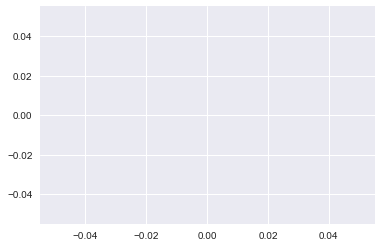

In [283]:
sns.distplot(df_grafico.tiempo_ajustado);

Es necesario revisar ese peak en los valores más bajos, ya que se puede deber a una mala codificación

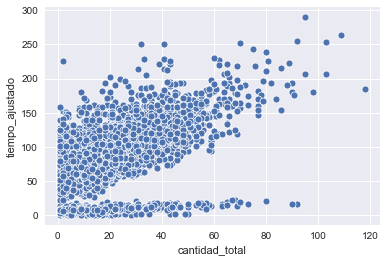

In [284]:
sns.scatterplot(data=df_grafico, x='cantidad_total', y='tiempo_ajustado');

El gráfico muestra evidencia para apoyar nuestra hipótesis, ya que se ve una correlación positiva entre la cantidad total de productos con el tiempo de entrega.

## Rating repartidor

In [285]:
sns.distplot(df_grafico.rating);

AttributeError: 'DataFrame' object has no attribute 'rating'

In [286]:
sns.scatterplot(data=df_grafico, x='rating', y='tiempo_ajustado');

ValueError: Could not interpret input 'rating'

En el caso del "Rating" del repartidor, de momento el gráfico no nos permite saber si es influyente en el tiempo de entrega, sobre todo por el hecho de que la distribución de las calificaciones es muy acotada entre 4.50 y 5

## Hora / Dia de la semana

### Hora

In [287]:
time = pd.DataFrame(df.actual_time.str.split(':', expand=True))
time.columns = ('hora','minuto','segundos')

AttributeError: 'DataFrame' object has no attribute 'actual_time'

In [288]:
df_grafico['hora'] = pd.to_numeric(time['hora'])

NameError: name 'time' is not defined

In [289]:
sns.countplot(data=df_grafico, x='hora',).set_title('Cantidad de Pedidos por hora');

ValueError: Could not interpret input 'hora'

La Mayor cantidad de pedidos se concentra entre 10 y 13, cayendo hasta retomar desde las 19 a las 21 hrs

In [290]:
df_grafico.groupby('hora').mean()['tiempo_ajustado']

KeyError: 'hora'

In [ ]:
plt.plot(df_grafico.groupby('hora').mean()['tiempo_ajustado'])
plt.title('Hora vs Tiempo de entrega')

Revisando las horas, notamos que a las 9 hay un peak, al igual que a las 19 horas y luego pasado las 21 hrs

### Dia de la semana

In [291]:
sns.countplot(data=df_grafico, x='dow',).set_title('Cantidad de Pedidos por dia de la semana');

ValueError: Could not interpret input 'dow'

De Lunes a jueves se concentra la mayor cantidad de pedidos, siendo viernes a domingo los que tienen menos edidos

In [292]:
df_grafico.groupby('dow').mean()['tiempo_ajustado']

KeyError: 'dow'

In [293]:
plt.plot(df_grafico.groupby('dow').mean()['tiempo_ajustado'])
plt.title('Dia de la Semana vs Tiempo de Entrega');

KeyError: 'dow'

El tiempo de entrega es consistente con la cantidad de pedidos de cada día, excepto en el dia jueves, donde es menor en promedio que la cantidad de pedidos del mismo día

### Dia y Fecha

In [294]:
table = pd.pivot_table(df_grafico, values='tiempo_ajustado', index=['hora'], columns=['dow'], aggfunc=np.mean)

KeyError: 'hora'

In [295]:
sns.heatmap(table,annot=True, cmap='coolwarm', fmt=".1f").set_title("Tiempo de entrega por dia/hora");

NameError: name 'table' is not defined

Notamos que diferentes dias tienen diferentes peaks de tiempo de demora, por ejemplo, los dias lunes hay grandes tiempos de entrega entre 15 y 16, y luego entre 18 y 22. Por otro lado, el dia martes tiene altos tiempos de entrega duante la mañana. El dia miercoles a las 21 hrs tiene untiempode espera superlativamente mayor al resto de los dias.


In [296]:
from haversine import haversine, Unit


In [297]:
distancias = pd.DataFrame()

In [309]:
distancias['latitud_x'] = pd.to_numeric(df['latitud'].str.replace('.',''))*100/(10**(df['latitud'].str.replace('.','').apply(len)))
distancias['longitud_x'] = pd.to_numeric(df['longitud'].str.replace('.',''))*1000/(10**(df['longitud'].str.replace('.','').apply(len)))

In [310]:
distancias['latitud_y'] = pd.to_numeric(df['latitud_tienda'].str.replace('.',''))*100/(10**(df['latitud_tienda'].str.replace('.','').apply(len)))
distancias['longitud_y'] = pd.to_numeric(df['longitud_tienda'].str.replace('.',''))*1000/(10**(df['longitud_tienda'].str.replace('.','').apply(len)))




In [311]:
d1 = (distancias['latitud_x'][3], distancias['longitud_x'][3])
d2 = (distancias['latitud_y'][3], distancias['longitud_y'][3])

In [314]:
haversine(d1,d2)

1.8990971405296402

In [316]:
distancias['distancia']= distancias.apply(lambda x: haversine((x['latitud_x'], x['longitud_x']),(x['latitud_y'], x['longitud_y'])))

KeyError: ('latitud_x', 'occurred at index latitud_x')